In [1]:
import time
print(time.ctime())

Wed Jun 21 19:42:28 2017


<sub>
This notebook is an example, related to a german journal paper. Please contact the pycartan authors if you are interested in an english translation.
</sub>

<hr>

<sub>Bei diesem IPython-Notebook handelt es sich um eine Beispiel-Rechnung als Ergänzung zum Aufsatz "Über die Existenz einer separierten Koordinatendarstellung für unteraktuierte mechanische Systeme", eingereicht zur Veröffentlichung bei der Zeitschrift *at - Automatisierungstechnik*.

Der enthaltene Pythoncode hängt u.a. von folgenden Modulen ab:

* [`symbtools`](https://github.com/TUD-RST/symbtools) 
  (Grundlegende Funktionalität zum symbolischen Rechnen in der Regelungstheorie)
    
* [`pycartan`](https://github.com/TUD-RST/pycartan)
  (Funktionalität zum Rechnen mit Differentialformen)

* [`displaytools`](https://github.com/cknoll/displaytools)
 (IPython-Erweiterung, welche spezielle Kommentare (z.B. `##:`) einführt um das Ergebnis einer Zuweisung anzeigen zu lassen.)


Für weitere Informationen siehe auch: 
https://raw.githubusercontent.com/cknoll/beispiele/master/readme.md
</sub>

---

[//]: # (custom_config_start)
$$
\newcommand{\col}{\mathrm{col}}
\newcommand{\opspan}{\operatorname{span}}
\newcommand{\bs}{\boldsymbol}
\newcommand{\mb}{\mathbf}
\newcommand{\nx}{n_{\boldsymbol x}}
\newcommand{\Ddt}{\left(\tfrac{d}{dt}\right)}
$$

[//]: # (custom_config_end)

**Betrachtetes System**: unteraktuierten Viergelenkmanipulator mit Stellkräften am Endeffektor.<br>

<img src="images/manipulator_def_notebook.png">

**Betrachtete Frage**:
Existiert eine separierte Koordinatendarstellung (Aufspaltung in aktuierte und nicht aktuierte Koordinaten)

In [2]:
%load_ext displaytools3

import sympy as sp
from sympy import sin, cos, pi
from sympy.interactive import printing
import symbtools as st
import symbtools.modeltools as mt
from symbtools.modeltools import Rz # Rotationsmatrix


printing.init_printing(1)

In [3]:
# generrischer Code für unteraktuierte Systeme

t = sp.Symbol('t')
np = 4
nq = 0
n = np + nq
pp = st.symb_vector("p1:{0}".format(np+1))
qq = st.symb_vector("q1:{0}".format(nq+1))


aa = st.symb_vector("a1:{0}".format(nq+1))

ttheta = st.row_stack(pp, qq) ##:T
tthetad = st.time_deriv(ttheta, ttheta) ##:T
tthetadd = st.time_deriv(ttheta, ttheta, order=2) ##:T
st.make_global(ttheta, tthetad)

---


---


---


In [4]:
params = sp.symbols('s1, s2, s3, s4, m1, m2, m3, m4, J1, J2, J3, J4, l1, l2, l3, l4, kappa')
st.make_global(params)


# Hilfsterme
#QQ = st.symb_vector("Q1, Q2, Q3, Q4")

# Kräfte am Endeffektor
#tau1, tau2 = ttau = st.symb_vector("tau1, tau2")

### Bestimmung von $\bs B(\bs \theta)$

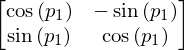

In [5]:
Rz(p1) # Rotationsmatirx veranschaulichen

In [6]:

Fx, Fy = FF = st.symb_vector('F_t, F_n')

FF4 = sp.Matrix([Fx, Fy])


Q4 = l4 * FF4[1]

FF3 = Rz(p4)[:, 0]*FF4[0]
Q3 = l3 * FF3[1]

FF2 = Rz(p3)[:, 0]*FF3[0]
Q2 = l2 * FF2[1]

FF1 = Rz(p2)[:, 0]*FF2[0]
Q1 = l1 * FF1[1]


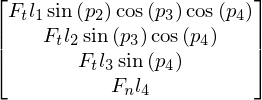

---


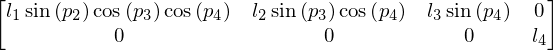

---


In [7]:
QQ = sp.Matrix([Q1, Q2, Q3, Q4]) ##:
B = QQ.jacobian(FF) ##:T

In [8]:
import pycartan as pc

w1, w2 = ww = pc.VectorDifferentialForm(1, ttheta, coeff=B.T)

In [9]:
res1 = w1.d^w1^w2
res2 = w2.d^w1^w2

In [10]:
c = res1.coeff[0]##:

---


In [11]:
cs = c.simplify() ##:


---


In [12]:
res2

(0)dp1^dp2^dp3^dp4